# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd

In [3]:
df_credit = pd.read_csv('creditcard.csv')

In [5]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df_credit.shape

(284807, 31)

In [17]:
df_credit.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [285]:
#Make dataset as a balanced dataset

df_fraud = df_credit[df_credit['Class'] == 1]
df_nonfraud = df_credit[df_credit['Class'] == 0]

sample_nonfraud = df_nonfraud.sample(3*df_fraud.shape[0])

data_model = pd.concat([df_fraud, sample_nonfraud], axis = 0, ignore_index = True)
data_model.shape

(1968, 31)

In [286]:
#Spliting data into input and output variables

x = (data_model.loc[:, data_model.columns != 'Class'])
y = (data_model.loc[:, data_model.columns == 'Class'])

print(x.shape)
print(y.shape)

(1968, 30)
(1968, 1)


In [287]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.3, random_state=20)

In [288]:
train_data.shape

(1377, 30)

In [289]:
train_labels.shape

(1377, 1)

In [290]:
test_data.shape

(591, 30)

In [291]:
test_labels.shape

(591, 1)

In [292]:
test_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
852,41335.0,-1.501383,1.832834,0.857047,0.167470,-0.249180,-0.803905,0.775350,-0.706535,-0.155657,1.140185,-0.001237,0.065916,0.533749,-0.069558,1.608957,-0.799985,0.321150,-0.773329,2.118062,0.055400,-0.122665,-0.969474,0.136305,0.419701,-0.748259,0.672377,-1.617293,0.138053,11.43
454,154309.0,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,-1.134454,0.713878,0.979675,-1.339031,0.984993,-0.382471,-0.934616,-0.052419,0.511162,0.731999,1.878612,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1096.99
1528,71925.0,-4.848814,4.115409,-0.365102,-2.207987,-1.303773,-1.580605,0.447277,0.107152,3.882084,5.485631,0.336565,0.210749,-0.037808,-1.625796,0.819456,0.037346,-0.845751,-0.818509,-1.423529,2.433021,-0.795637,-0.474841,0.129484,0.678655,0.534452,0.619468,0.710880,-0.372054,1.15
270,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,-0.713474,1.274629,0.023682,-1.521696,0.727242,0.166505,0.348038,-0.566390,0.216016,-1.140376,0.634184,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33
831,154214.0,-0.065158,0.767002,0.115886,-1.101918,1.050863,-0.795814,1.155005,-0.234548,-0.173976,-0.794153,-1.507333,0.208258,0.541163,0.036083,-0.794124,0.177921,-0.835634,-0.713239,-0.421279,-0.200170,-0.169787,-0.414181,0.038402,-0.636093,-0.951248,-0.014073,0.156220,0.216679,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,121369.0,-1.800912,1.556746,-0.517790,-1.156605,0.892185,0.609004,-0.226713,-1.778642,0.075451,-0.743851,-0.529404,0.504132,-0.599919,0.841244,0.436671,-1.300943,0.952597,-1.883304,-1.071371,-0.831445,2.311945,-0.553737,0.174032,-1.064234,-0.306011,-0.013493,0.304504,0.092633,0.01
219,65728.0,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,0.881268,-0.324704,-0.263264,-1.112735,-0.540850,1.533411,0.831443,-0.473347,1.190121,0.273799,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01
1277,80076.0,1.122714,-1.225941,1.507558,-0.151606,-1.896159,0.260417,-1.387743,0.270243,0.496124,0.233880,-0.552028,-0.053598,-0.229996,-1.117807,-0.863958,0.254216,1.229650,-1.947664,0.460946,0.121997,0.177307,0.673542,-0.043570,0.466529,0.296888,-0.115801,0.077090,0.038051,75.00
993,71993.0,-0.923531,0.281053,1.681561,0.997668,0.844026,-0.635176,-0.111969,0.150008,-1.030064,-0.136914,1.300797,0.268415,-0.026647,-0.004890,1.272284,0.014059,0.323836,0.740400,2.078604,0.440656,-0.131488,-0.649235,-0.037343,-0.029220,-0.049852,0.382763,0.029894,0.096506,1.98


In [293]:
#Normalizaing the data

mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std


In [294]:
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1042,0.573470,-2.800681,-6.213318,0.865445,2.918558,5.487056,-5.954057,-2.289798,0.397283,0.187577,1.296375,-0.887388,0.639165,1.813496,0.546784,2.032658,0.287930,0.367409,0.847280,0.750008,5.907954,0.733706,-0.181026,4.052568,0.941483,0.787544,0.804072,-0.646901,1.106171,0.423146
1193,-1.063754,-0.051082,-0.061648,0.650034,-0.023289,0.074012,0.070030,0.456240,0.034706,0.144356,0.347808,-0.390267,0.432397,0.054143,0.517408,1.637089,0.245562,0.386985,0.083403,-0.188469,-0.104261,-0.074903,0.324756,0.474492,0.653476,-0.474681,-0.940616,0.068841,-0.512041,0.091980
1098,1.315765,0.756176,-0.242707,-0.054268,-0.326728,0.481856,0.043252,0.341783,-0.056018,0.396330,0.311904,-0.013006,0.722606,0.961181,0.220652,-0.585773,0.608314,0.352283,0.401881,0.357151,-0.190655,-0.229281,-0.830765,0.269975,0.064041,-0.359276,0.328840,-0.155342,-0.194047,-0.362192
1760,1.103417,0.097609,0.035736,0.216044,-0.670449,0.493764,-0.204477,0.456542,0.013169,0.246613,0.256669,-1.178312,0.560287,1.412374,0.464987,-0.477621,0.479762,0.194114,-0.008526,0.176624,-0.251436,-0.196816,-0.649675,0.174920,-1.645950,-0.475894,0.332677,-0.254710,0.089052,-0.370603
669,1.485812,0.297773,-0.246777,0.362764,-0.917257,0.386411,-0.134417,0.365466,-0.074802,-0.434588,0.506430,-0.852348,0.036972,0.037942,0.462139,0.700873,0.558370,0.445311,-0.223253,1.265553,0.091976,0.165912,1.479435,-0.320411,0.848774,-0.450092,0.279747,0.159877,0.483179,-0.408408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,1.405427,0.539402,-0.853495,0.112129,0.103720,0.062350,0.580717,0.286197,0.025220,0.833066,0.430480,-0.589502,0.345234,-1.526869,0.603142,0.122736,0.741044,0.097629,0.779667,-0.077811,0.450673,-0.051323,-0.776471,-0.146227,-2.118097,-0.879204,-1.883631,-0.120068,0.008921,1.429304
1247,-1.376376,0.535106,-0.551914,0.506834,-0.929721,-0.093477,0.397479,0.080955,0.091934,1.304594,0.080869,0.289686,0.658536,-1.272414,0.522090,1.343952,0.095810,0.422683,0.240493,0.107394,-0.345851,0.021113,0.848406,-0.059320,-0.391838,0.437343,0.287350,0.019988,-0.050997,-0.353109
271,-0.135018,-0.448068,0.419769,0.239557,0.735083,-0.323615,0.359955,-0.679143,-0.683322,-0.191515,-0.763731,0.445210,-0.241875,0.679552,-1.002470,-0.280625,-1.049427,-0.482391,-0.805148,0.600746,0.614323,-0.001490,1.261461,-0.299849,0.943535,-0.398471,-0.150654,0.562767,-0.168752,-0.404203
474,1.461157,0.403389,0.827403,-1.057483,1.960273,0.219614,-1.295789,-0.328489,0.113211,-1.531593,-1.147284,1.213448,-1.574127,-0.371363,-2.517781,-0.860500,-0.856786,-0.967206,-0.729085,-1.059519,0.466323,0.206680,-0.341625,-0.202006,-0.862282,1.106257,0.461143,1.168250,1.363911,-0.392891


In [295]:
test_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
852,-1.063754,-0.089918,0.331297,0.523290,-0.334195,0.158030,-0.300075,0.485862,-0.217655,0.243320,0.706692,-0.386544,0.425072,0.579477,0.428255,1.690009,0.079114,0.425282,-0.147007,1.835947,-0.073341,-0.134012,-0.943196,0.146833,0.743601,-1.315239,1.312627,-2.284048,0.349882,-0.364547
454,1.329236,0.248280,-1.606942,-0.210015,-0.335728,-0.205702,-0.303523,0.651623,-0.153848,1.121519,0.055392,-0.070470,0.679946,-1.245261,0.710377,-0.406495,0.028773,0.340973,0.547014,0.556482,1.894456,0.247575,-0.159746,-1.017736,0.218965,-0.139284,-2.282457,-0.302588,0.314123,4.200550
1528,-0.415804,-0.888069,1.098218,0.265296,-1.209467,-0.175012,-0.785669,0.410980,0.002775,2.359794,1.950928,-0.237239,0.465470,0.022582,0.011917,0.858851,0.392213,0.161930,-0.171419,-1.433271,2.492831,-0.445154,-0.450900,0.139320,1.184600,0.914038,1.206851,0.905494,-1.191802,-0.407777
270,-0.143321,-0.073104,-0.554156,0.579499,-0.252289,0.147914,0.168064,0.611600,0.026763,0.038247,0.175932,0.177376,0.413291,-1.423240,0.641421,0.171447,0.508388,0.224977,0.387544,-1.171894,0.551342,0.073228,0.035633,0.927354,0.224631,0.256944,-1.269973,-0.233272,0.040223,1.077448
831,1.327224,0.252531,-0.026811,0.366832,-0.801920,0.568587,-0.295016,0.572518,-0.089792,0.233718,0.152831,-1.052223,0.464775,0.586701,0.456517,-0.839868,0.444777,0.164213,-0.114540,-0.508101,-0.349178,-0.155798,-0.390526,0.038999,-1.054417,-1.668021,-0.059727,0.145624,0.587510,-0.408450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,0.631509,-0.161337,0.238535,0.233063,-0.822070,0.518476,0.583277,0.257144,-0.508092,0.364461,0.167234,-0.619988,0.547303,-0.525109,0.671920,0.455868,-0.108206,0.567790,-0.746737,-1.108196,-1.030516,0.991607,-0.529423,0.188387,-1.783541,-0.546638,-0.058568,0.348769,0.212611,-0.412571
219,-0.547067,0.560775,-0.509283,0.284995,-0.613090,0.045726,-0.016472,0.197879,-0.029181,-0.091777,0.455969,0.003514,0.316116,-0.197090,0.149176,-0.573230,0.951628,0.540447,0.015076,0.979371,0.162377,-0.089345,-0.272162,-0.202061,-0.714576,0.844862,-0.598842,-0.069940,0.038652,-0.000453
1277,-0.243151,0.535763,-0.696418,0.660612,-0.451763,-0.362089,0.365340,-0.007859,0.046957,0.584966,0.447189,-0.629988,0.391736,-0.164675,0.147819,-0.913387,0.473306,0.630316,-0.781511,0.306275,-0.001463,0.004677,0.692057,-0.051287,0.823348,0.501166,-0.263103,0.037217,0.047648,-0.097217
993,-0.414363,0.047863,-0.190084,0.697343,-0.028296,0.503267,-0.194586,0.283334,0.014385,-0.215020,0.341019,0.188942,0.481555,0.033457,0.445555,1.335571,0.383505,0.425888,0.670873,1.799524,0.342467,-0.138091,-0.624470,-0.044429,-0.020912,-0.101448,0.733630,-0.027440,0.224314,-0.404287


In [352]:
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [353]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [354]:
history = model.fit(train_data, train_labels, epochs=100, batch_size = 125, validation_split = 0.3)

Epoch 1/100
8/8 [==============================] - 1s 30ms/step - loss: 0.7699 - accuracy: 0.2713 - val_loss: 0.7122 - val_accuracy: 0.3502
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6834 - accuracy: 0.3966 - val_loss: 0.6658 - val_accuracy: 0.5242
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6540 - accuracy: 0.5670 - val_loss: 0.6317 - val_accuracy: 0.6618
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6241 - accuracy: 0.6970 - val_loss: 0.6011 - val_accuracy: 0.8068
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5984 - accuracy: 0.8027 - val_loss: 0.5708 - val_accuracy: 0.8720
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5663 - accuracy: 0.8660 - val_loss: 0.5413 - val_accuracy: 0.8913
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5455 - accuracy: 0.8903 - val_loss: 0.5125 - val_accuracy: 0.9058
Epoch 8/100
8/8 [=========

In [355]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

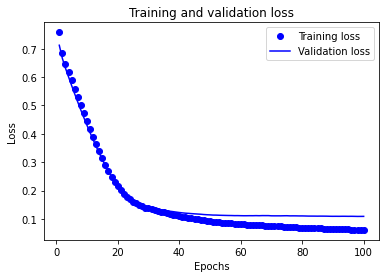

In [356]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


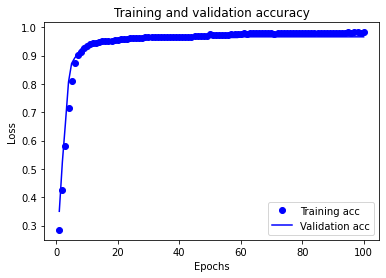

In [357]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [358]:
results = model.evaluate(test_data, test_labels)

19/19 [==============================] - 0s 973us/step - loss: 0.1239 - accuracy: 0.9662


In [359]:
prediction = model.predict(test_data)

In [360]:
y_predict = prediction.astype(dtype = 'u8')

In [361]:
y_actual = np.array(test_labels)



In [362]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_actual, y_predict))

[[434   0]
 [ 48 109]]
